# Plot gene networks for overlapping recomputed Fairfax eQTLs

This code plots the network of genes associated with:
1. Neanderthal-introgressed recomputed Fairfax eQTLs (present in Chen introgressed sequences)
2. All recomputed Fairfax eQTLs (p < 10<sup>-8</sup>).  

Monocytes in the Fairfax dataset were divided into 4 treatment groups: IFN, LPS 2h, LPS 24h and Naive.  
&nbsp;

Neanderthal SNPs from:
1. Dannemann M, Prufer K & Kelso J. Functional implications of Neandertal introgression in modern humans. *Genome Biol* 2017 **18**:61.
2. Simonti CN *et al.* The phenotypic legacy of admixture between modern humans and Neandertals. *Science* 2016 **351**:737-41.

Neanderthal-introgressed sequences by Chen *et al.* from:
* Chen L *et al.* Identifying and interpreting apparent Neanderthal ancestry in African individuals. *Cell* 2020 **180**:677-687.  

Recomputed Fairfax *et al.* (2014) eQTLs from:
* [EMBL-EBI eQTL Catalogue](https://www.ebi.ac.uk/eqtl/Data_access/)

---


First, the list of genes and associated p-values for each condition was obtained from: `/well/jknight/shiyao/data/fairfax/EMBL_recomputed/`. Genes associated with all recomputed eQTLs were saved as: `all_*_genes.txt` where * refers to ifn/lps2/lps24/naive. Genes associated with only Neanderthal-derived eQTLs were saved as `*_genes.txt` where * refers to ifn/lps2/lps24/naive.

The text files were inputted into the XGR R package to obtain subnet edge information, using the following code.

```r
# Gene enrichment/network analysis
library(XGR)
library(RCircos)
RData.location <- "http://galahad.well.ox.ac.uk/bigdata_dev/"

# Get subnet
dd <- read.csv('textfile.txt', sep = '\t', header = FALSE, check.names = TRUE) 
design <- structure(dd$V2, names = as.character(dd$V1))
subnet <- xSubneterGenes(design, network="STRING_high", STRING.only=NA, seed.genes=T)

## Visualise subnet
# Colored according to input significance
xVisNet(g=subnet, pattern=-log10(as.numeric(V(subnet)$significance)), vertex.shape="sphere", colormap="wyr")
# Colored according to transformed scores
xVisNet(g=subnet, pattern=as.numeric(V(subnet)$score), vertex.shape="sphere")

## Save subnet results to the files called 'subnet_edges.txt' and 'subnet_nodes.txt'
edges <- igraph::get.data.frame(subnet, what="edges")
utils::write.table(edges, file="subnet_edges.txt", sep="\t", row.names=FALSE)
output <- igraph::get.data.frame(subnet, what="vertices")
utils::write.table(output, file="subnet_nodes.txt", sep="\t", row.names=FALSE)
```

---


Next, gene networks were plotted in Python using the subnet_edges.txt files.

In [1]:
# Import modules
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

## All recomputed eQTLs

### IFN

In [2]:
lines = open('all_subnet_edges_ifn.txt', 'r').read().splitlines()
G = nx.Graph()
for line in lines[1:]:
    temp = line.split('\t')
    G.add_edge(temp[0].strip('"'), temp[1].strip('"'))

# What are the central nodes:
central_nodes = nx.betweenness_centrality(G)
maxi = ''
maxo = 0
for item in central_nodes:
    if central_nodes[item] > 0.3:
        print(item, central_nodes[item] * 100)
    if central_nodes[item] > maxo:
        maxo = central_nodes[item]
        maxi = item

for node in G:
    if G.degree(node) > 7:
        print(node, G.degree(node))

TP53 54.9815354713314
MAPK8 31.8530612244898
CTNNB1 9
TP53 17
MAPK8 8


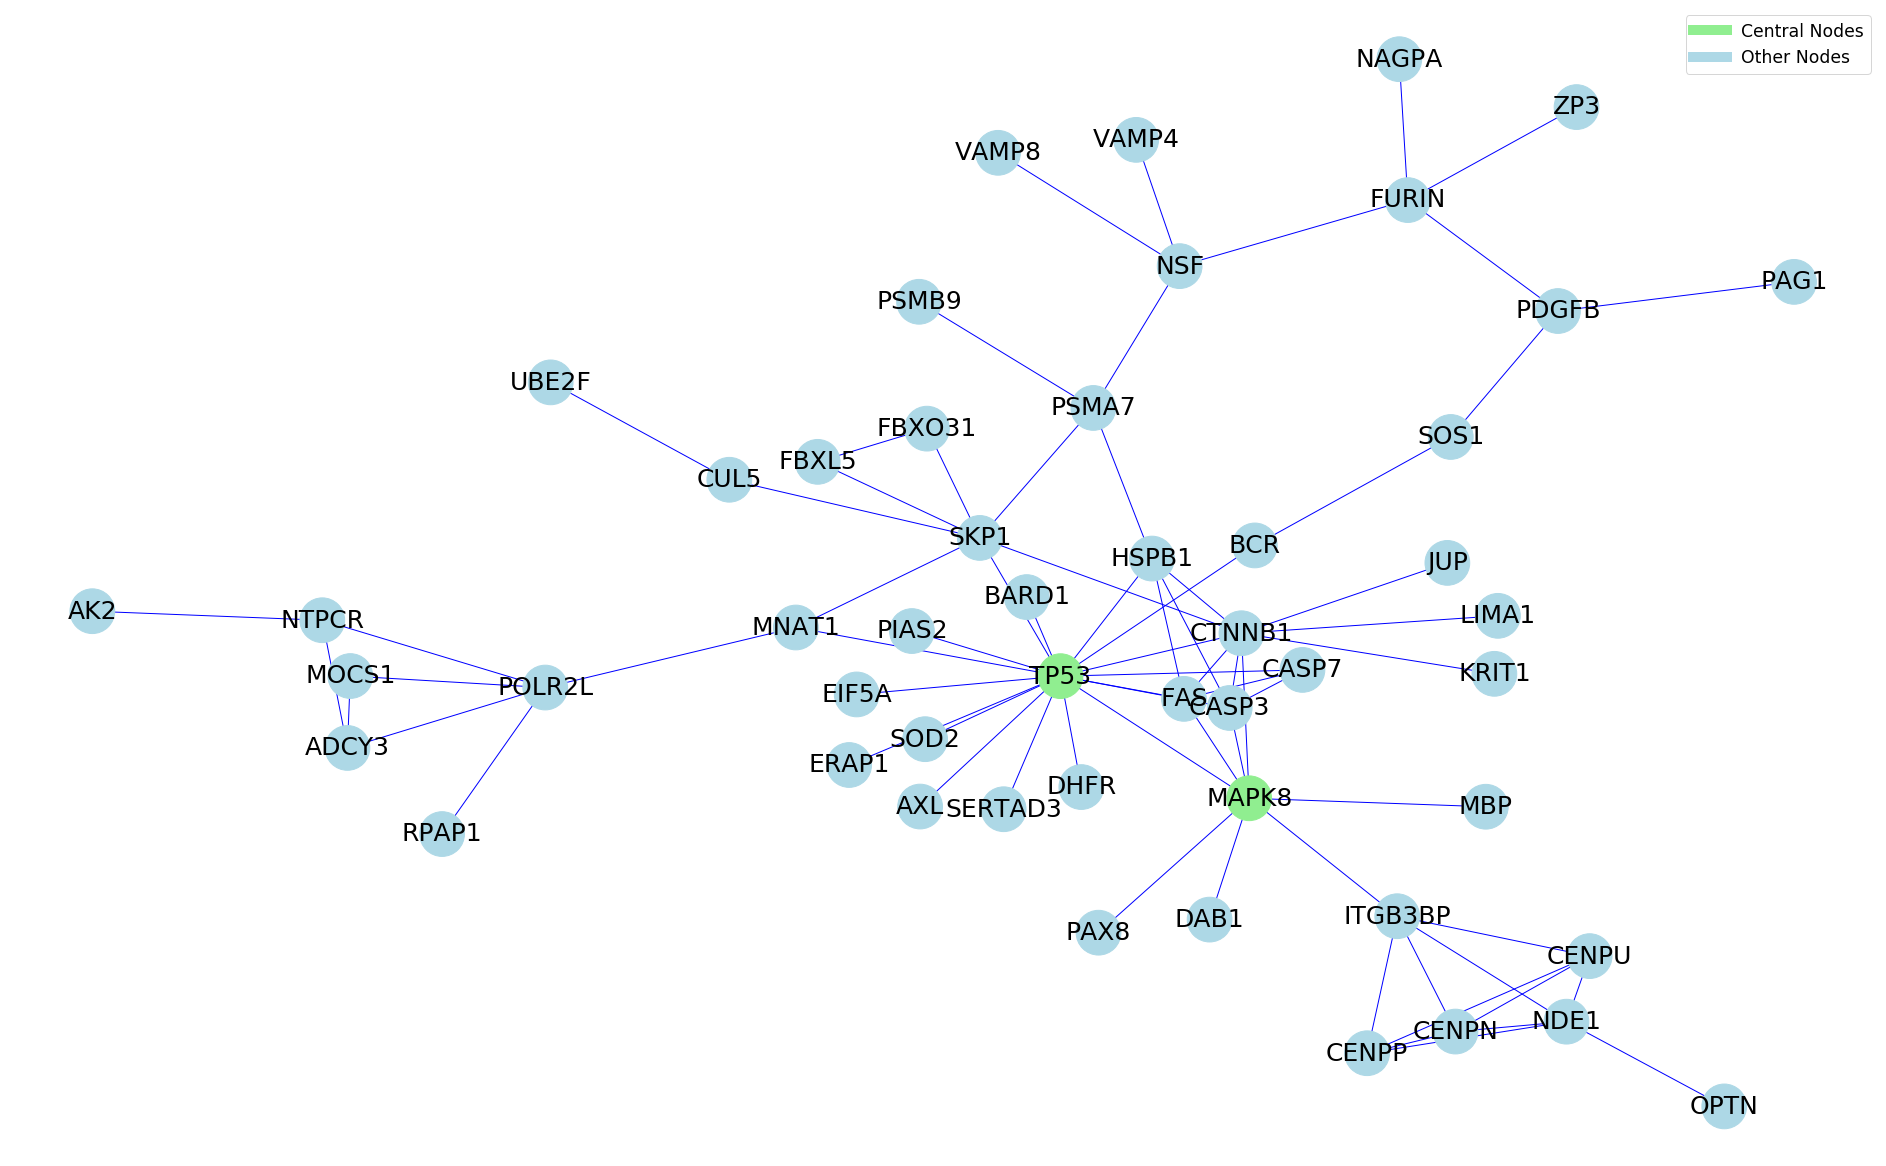

In [3]:
# Highlight central nodes
key_nodes = ['TP53', 'MAPK8']
lines = open('all_subnet_edges_ifn.txt', 'r').read().splitlines()
for line in lines[1:]:
    temp = line.split('\t')
    if temp[0] in key_nodes or temp[1] in key_nodes:
        G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='green')
    else:
        G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='blue')
edges = G.edges()
colors = [G[u][v]['color'] for u, v in edges]

node_map = []
color_map = []
legend_to_do = []
for node in G:
    if node in key_nodes:
        color_map.append('lightgreen')
    else:
        color_map.append('lightblue')
legend_to_do.append(('Central Nodes', 'lightgreen'))
legend_to_do.append(('Other Nodes', 'lightblue'))

fig = plt.figure()
fig.set_figheight(16)
fig.set_figwidth(26)
nx.draw(G, pos=graphviz_layout(G), edges=edges, edge_color=colors, with_labels=True,
        node_color=color_map, font_size=25, node_size=2000)

custom_lines = []
labels = []
for item in legend_to_do:
    custom_lines.append(Line2D([0], [0], color=item[1], lw=10))
    labels.append(item[0])

plt.legend(custom_lines, labels, loc=0, fontsize='xx-large')
plt.show()

### Naive

In [4]:
lines = open('all_subnet_edges_naive.txt', 'r').read().splitlines()
G = nx.Graph()
for line in lines[1:]:
    temp = line.split('\t')
    G.add_edge(temp[0].strip('"'), temp[1].strip('"'))

# What are the central nodes:
central_nodes = nx.betweenness_centrality(G)
maxi = ''
maxo = 0
for item in central_nodes:
    if central_nodes[item] > 0.3:
        print(item, central_nodes[item] * 100)
    if central_nodes[item] > maxo:
        maxo = central_nodes[item]
        maxi = item

for node in G:
    if G.degree(node) > 7:
        print(node, G.degree(node))

UBA52 97.7891156462585
UBA52 42


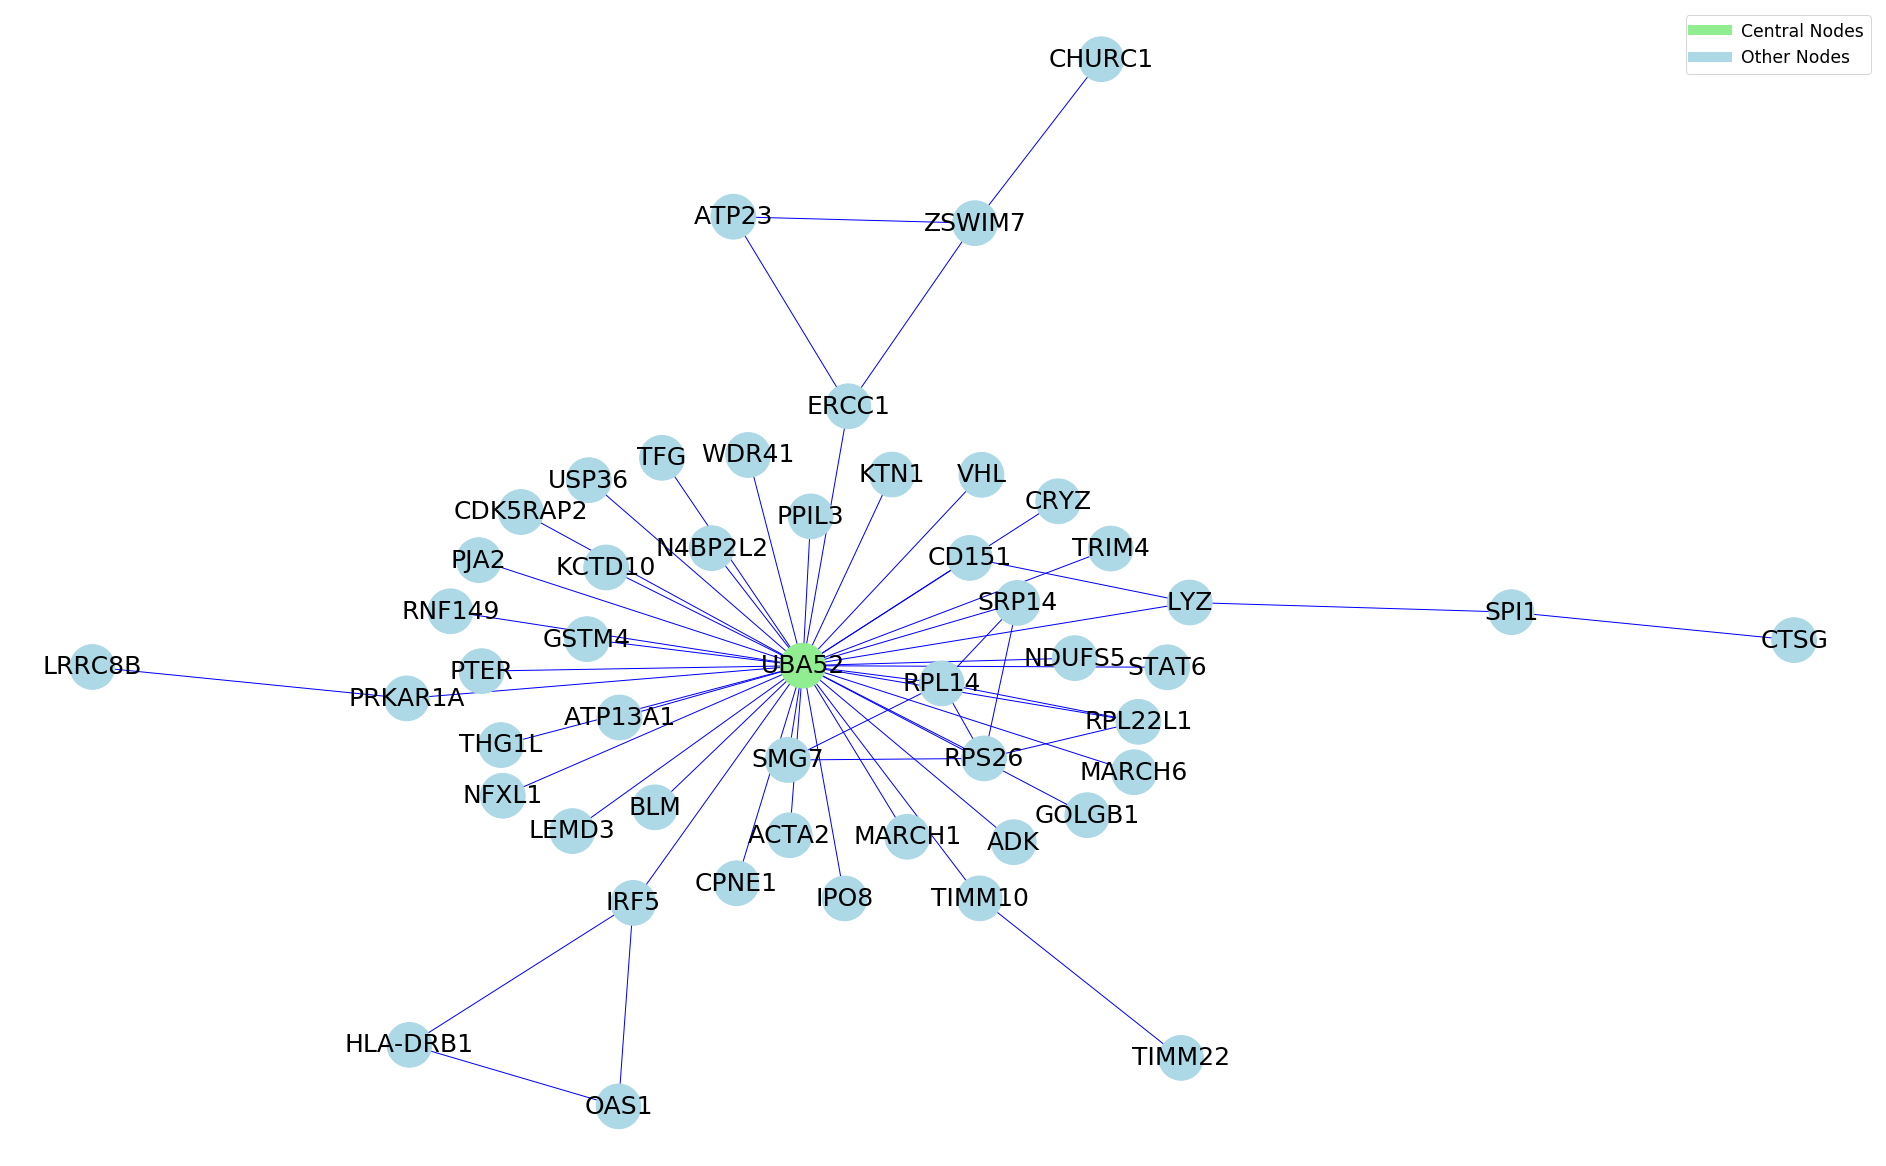

In [5]:
# Highlight central nodes
key_nodes = ['UBA52']
lines = open('all_subnet_edges_naive.txt', 'r').read().splitlines()
for line in lines[1:]:
    temp = line.split('\t')
    if temp[0] in key_nodes or temp[1] in key_nodes:
        G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='green')
    else:
        G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='blue')
edges = G.edges()
colors = [G[u][v]['color'] for u, v in edges]

node_map = []
color_map = []
legend_to_do = []
for node in G:
    if node in key_nodes:
        color_map.append('lightgreen')
    else:
        color_map.append('lightblue')
legend_to_do.append(('Central Nodes', 'lightgreen'))
legend_to_do.append(('Other Nodes', 'lightblue'))

fig = plt.figure()
fig.set_figheight(16)
fig.set_figwidth(26)
nx.draw(G, pos=graphviz_layout(G), edges=edges, edge_color=colors, with_labels=True,
        node_color=color_map, font_size=25, node_size=2000)

custom_lines = []
labels = []
for item in legend_to_do:
    custom_lines.append(Line2D([0], [0], color=item[1], lw=10))
    labels.append(item[0])

plt.legend(custom_lines, labels, loc=0, fontsize='xx-large')
plt.show()

### LPS2

In [6]:
lines = open('all_subnet_edges_lps2.txt', 'r').read().splitlines()
G = nx.Graph()
for line in lines[1:]:
    temp = line.split('\t')
    G.add_edge(temp[0].strip('"'), temp[1].strip('"'))

# What are the central nodes:
central_nodes = nx.betweenness_centrality(G)
maxi = ''
maxo = 0
for item in central_nodes:
    if central_nodes[item] > 0.3:
        print(item, central_nodes[item] * 100)
    if central_nodes[item] > maxo:
        maxo = central_nodes[item]
        maxi = item

for node in G:
    if G.degree(node) > 7:
        print(node, G.degree(node))

CCND1 41.42728876062209
SRC 44.34097589653144
GRB2 9
CCND1 11
SRC 14


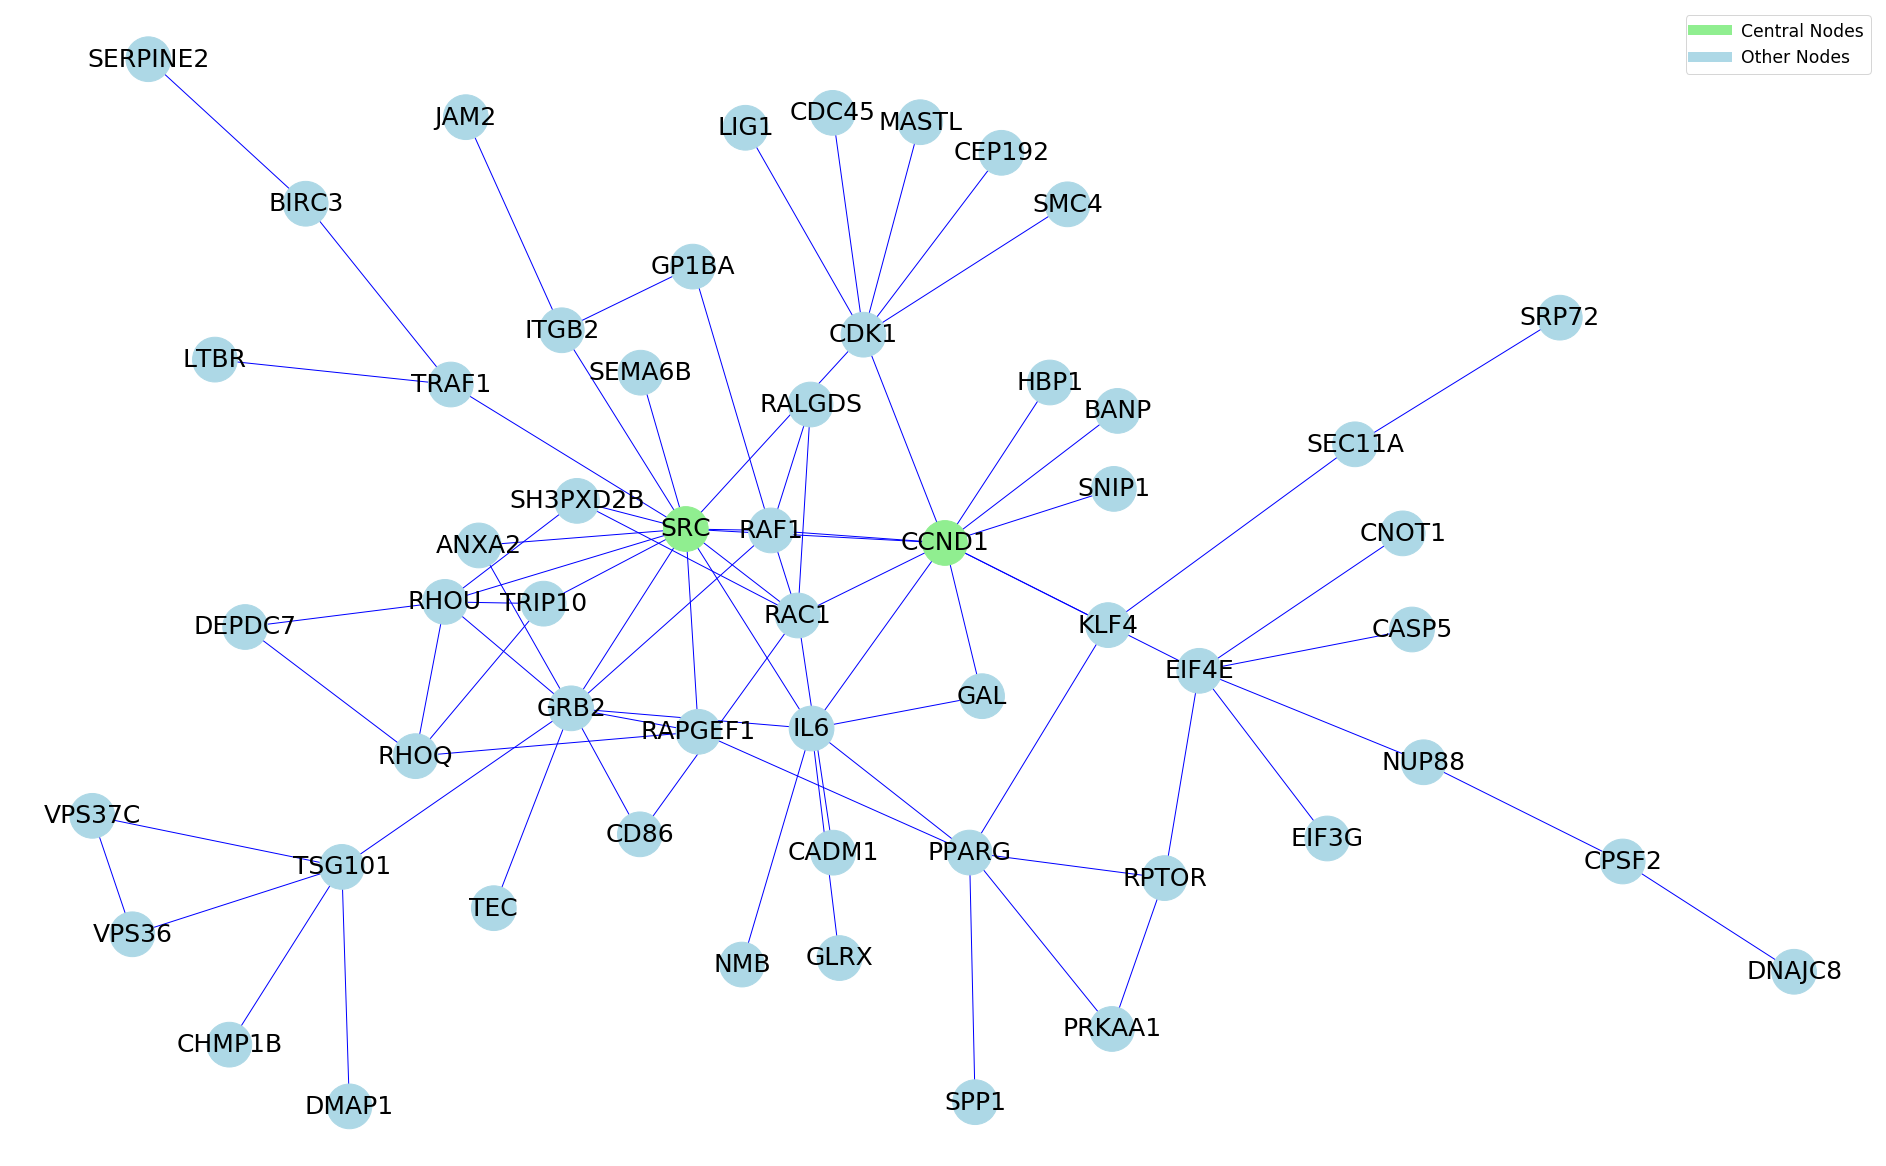

In [7]:
# Highlight central nodes
key_nodes = ['CCND1', 'SRC']
lines = open('all_subnet_edges_lps2.txt', 'r').read().splitlines()
for line in lines[1:]:
    temp = line.split('\t')
    if temp[0] in key_nodes or temp[1] in key_nodes:
        G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='green')
    else:
        G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='blue')
edges = G.edges()
colors = [G[u][v]['color'] for u, v in edges]

node_map = []
color_map = []
legend_to_do = []
for node in G:
    if node in key_nodes:
        color_map.append('lightgreen')
    else:
        color_map.append('lightblue')
legend_to_do.append(('Central Nodes', 'lightgreen'))
legend_to_do.append(('Other Nodes', 'lightblue'))

fig = plt.figure()
fig.set_figheight(16)
fig.set_figwidth(26)
nx.draw(G, pos=graphviz_layout(G), edges=edges, edge_color=colors, with_labels=True,
        node_color=color_map, font_size=25, node_size=2000)

custom_lines = []
labels = []
for item in legend_to_do:
    custom_lines.append(Line2D([0], [0], color=item[1], lw=10))
    labels.append(item[0])

plt.legend(custom_lines, labels, loc=0, fontsize='xx-large')
plt.show()

### LPS24

In [8]:
lines = open('all_subnet_edges_lps24.txt', 'r').read().splitlines()
G = nx.Graph()
for line in lines[1:]:
    temp = line.split('\t')
    G.add_edge(temp[0].strip('"'), temp[1].strip('"'))

# What are the central nodes:
central_nodes = nx.betweenness_centrality(G)
maxi = ''
maxo = 0
for item in central_nodes:
    if central_nodes[item] > 0.3:
        print(item, central_nodes[item] * 100)
    if central_nodes[item] > maxo:
        maxo = central_nodes[item]
        maxi = item

for node in G:
    if G.degree(node) > 9:
        print(node, G.degree(node))

MTOR 65.65902265902263
PWP1 10
YWHAZ 12
GRWD1 10
MTOR 11


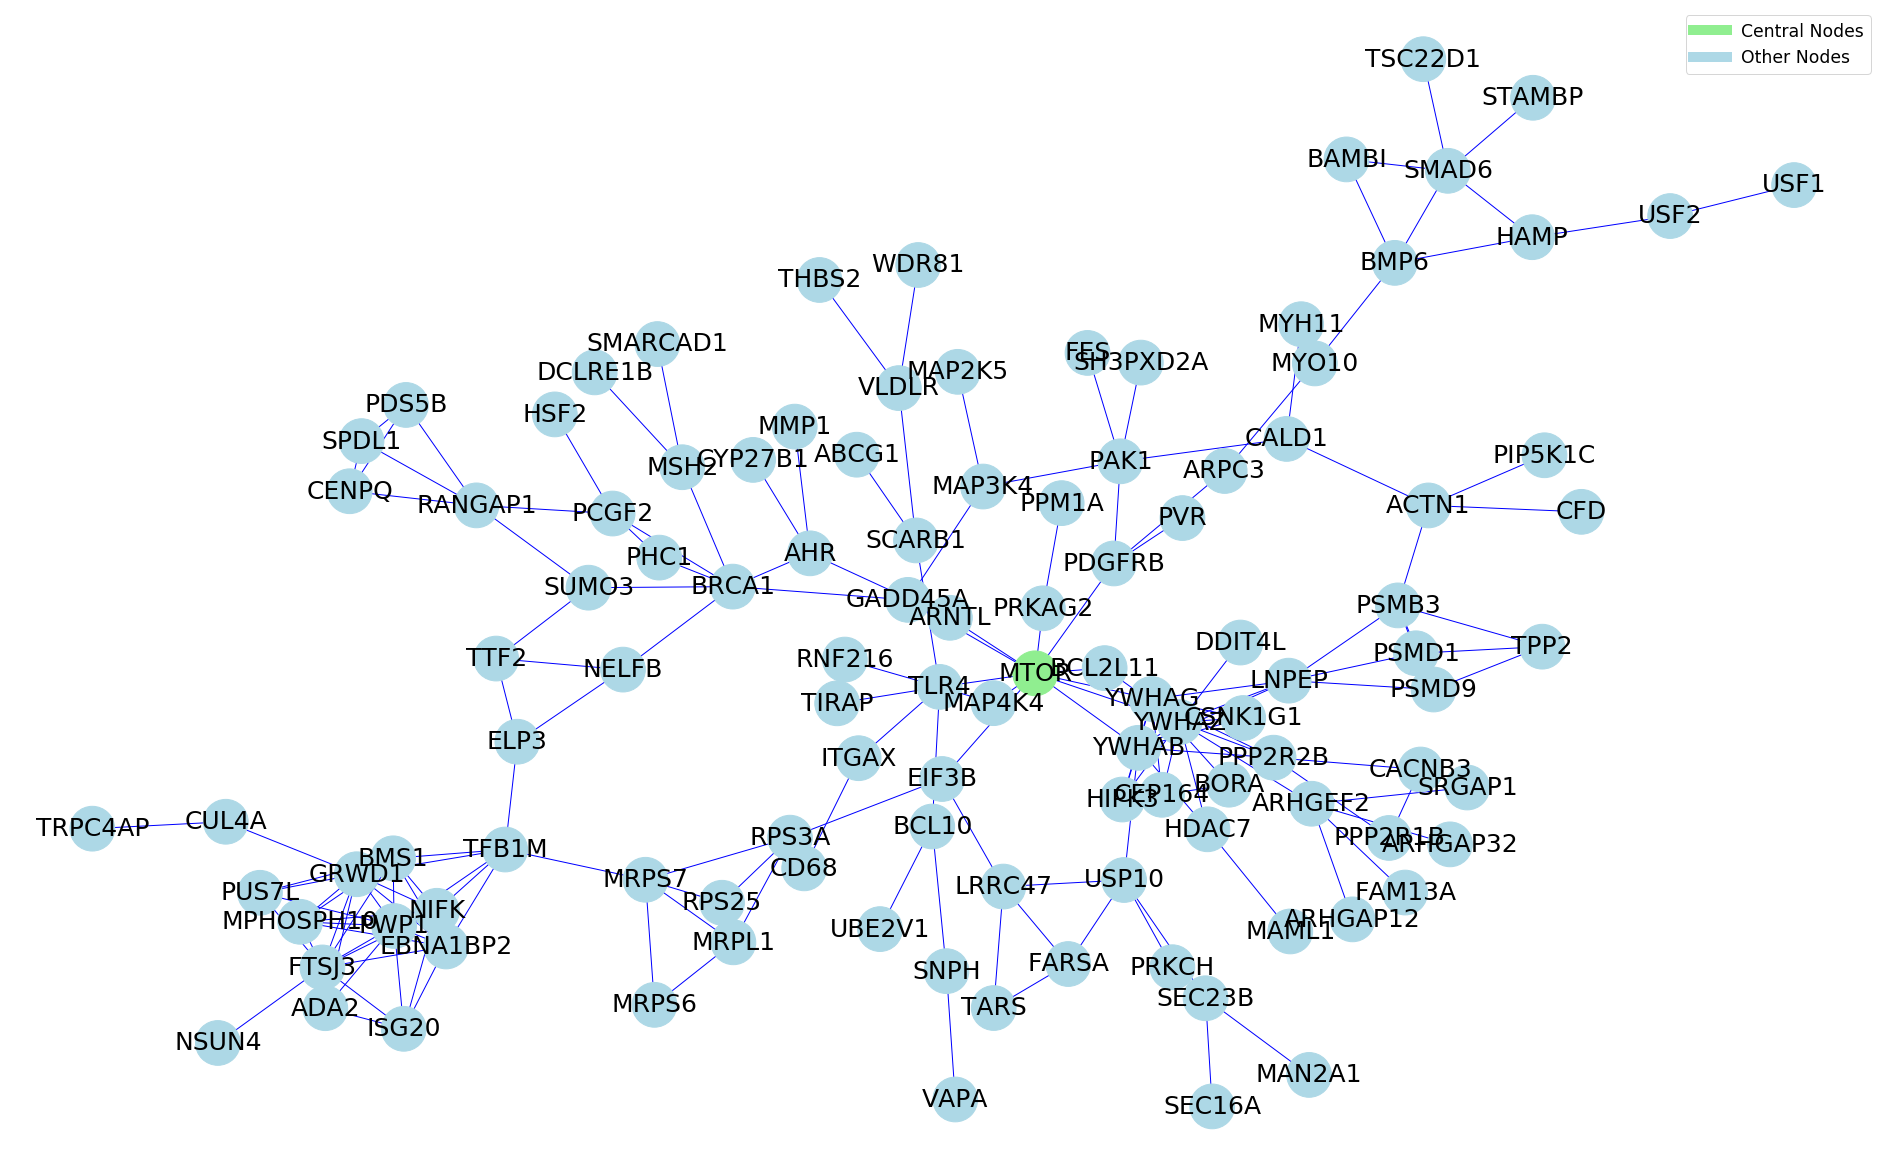

In [9]:
# Highlight central nodes
key_nodes = ['MTOR']
lines = open('all_subnet_edges_lps24.txt', 'r').read().splitlines()
for line in lines[1:]:
    temp = line.split('\t')
    if temp[0] in key_nodes or temp[1] in key_nodes:
        G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='green')
    else:
        G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='blue')
edges = G.edges()
colors = [G[u][v]['color'] for u, v in edges]

node_map = []
color_map = []
legend_to_do = []
for node in G:
    if node in key_nodes:
        color_map.append('lightgreen')
    else:
        color_map.append('lightblue')
legend_to_do.append(('Central Nodes', 'lightgreen'))
legend_to_do.append(('Other Nodes', 'lightblue'))

fig = plt.figure()
fig.set_figheight(16)
fig.set_figwidth(26)
nx.draw(G, pos=graphviz_layout(G), edges=edges, edge_color=colors, with_labels=True,
        node_color=color_map, font_size=25, node_size=2000)

custom_lines = []
labels = []
for item in legend_to_do:
    custom_lines.append(Line2D([0], [0], color=item[1], lw=10))
    labels.append(item[0])

plt.legend(custom_lines, labels, loc=0, fontsize='xx-large')
plt.show()

---

## Only Neanderthal-derived eQTLs

### IFN

In [10]:
lines = open('nean_subnet_edges_ifn.txt', 'r').read().splitlines()
G = nx.Graph()
for line in lines[1:]:
    temp = line.split('\t')
    G.add_edge(temp[0].strip('"'), temp[1].strip('"'))

# What are the central nodes:
central_nodes = nx.betweenness_centrality(G)
maxi = ''
maxo = 0
for item in central_nodes:
    if central_nodes[item] > 0.3:
        print(item, central_nodes[item] * 100)
    if central_nodes[item] > maxo:
        maxo = central_nodes[item]
        maxi = item

for node in G:
    if G.degree(node) > 3:
        print(node, G.degree(node))

HLA-C 60.0
IRF5 33.33333333333333
HLA-C 5
IRF5 4


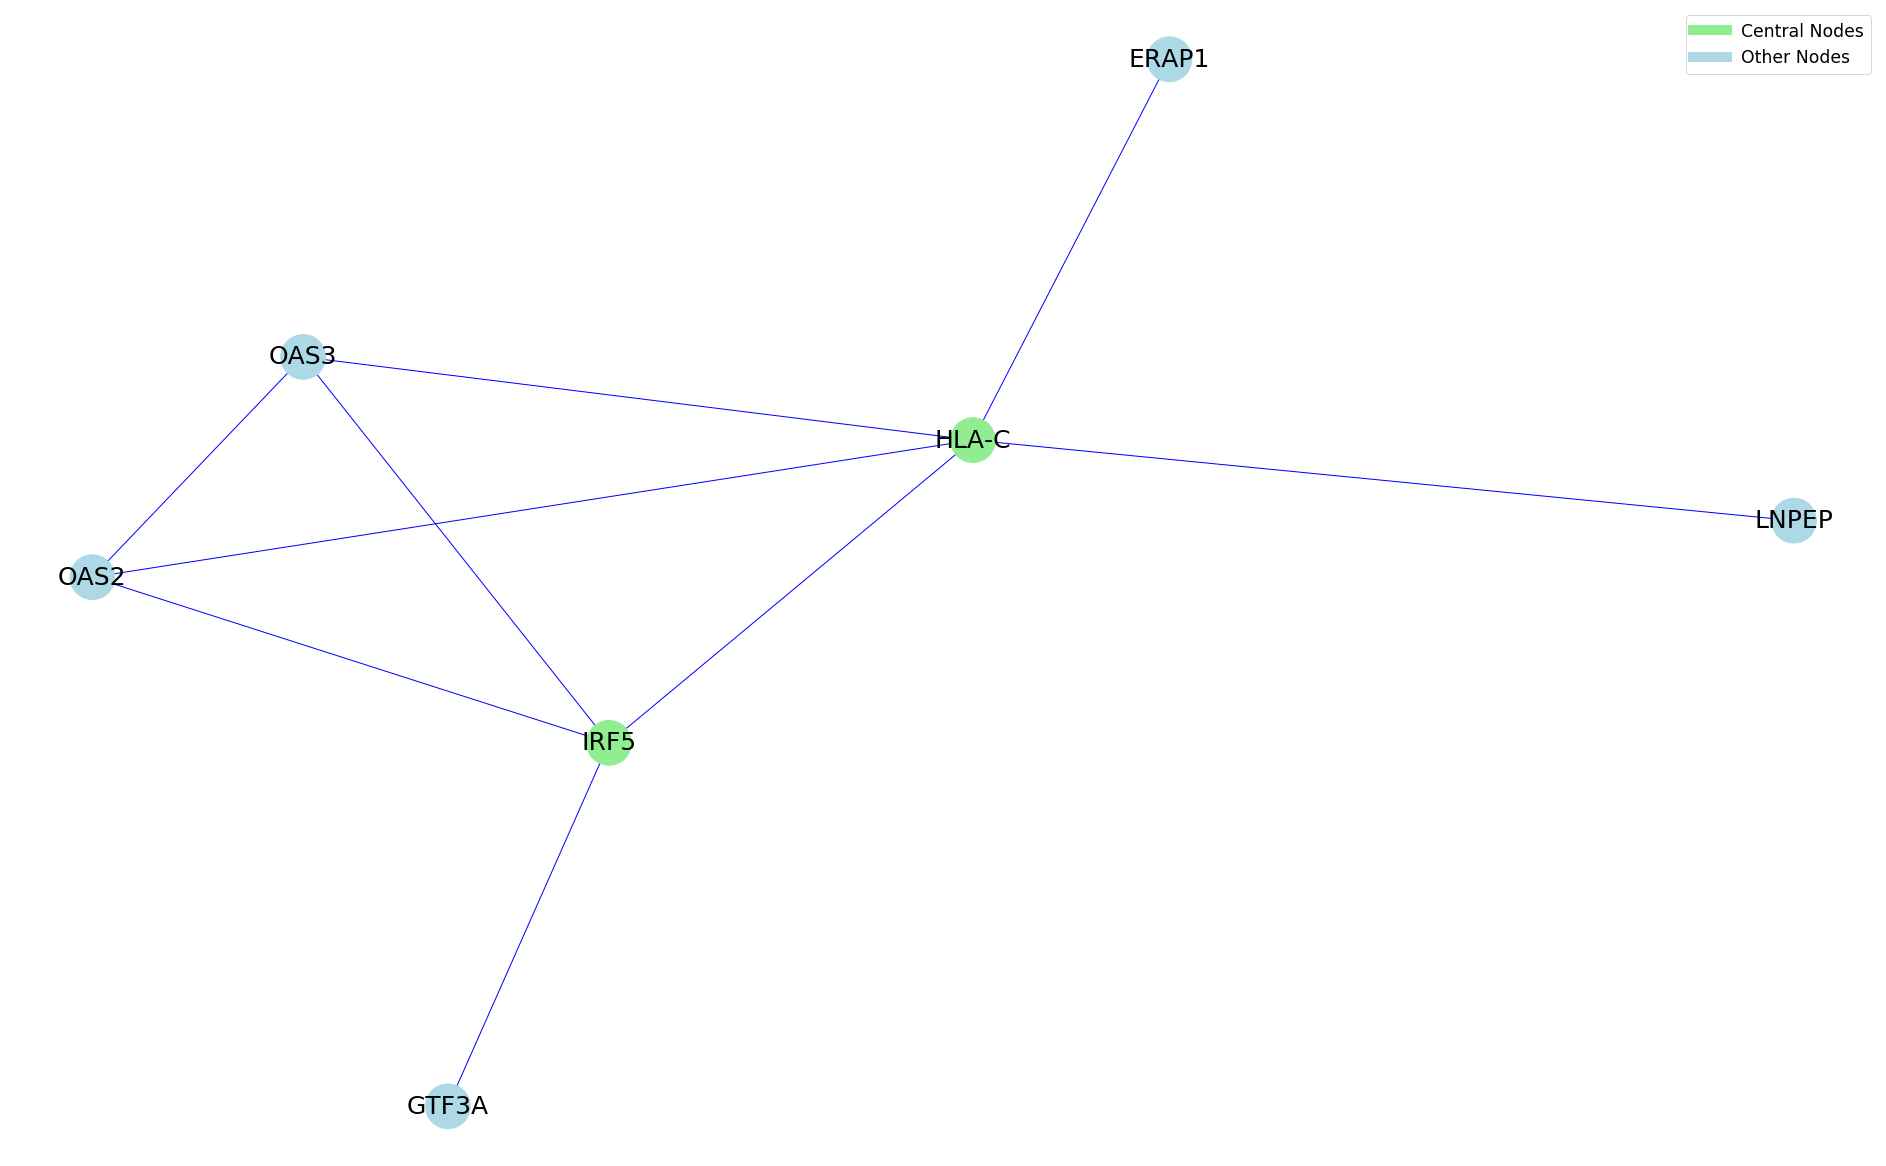

In [11]:
# Highlight central nodes
key_nodes = ['HLA-C', 'IRF5']
lines = open('nean_subnet_edges_ifn.txt', 'r').read().splitlines()
for line in lines[1:]:
    temp = line.split('\t')
    if temp[0] in key_nodes or temp[1] in key_nodes:
        G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='green')
    else:
        G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='blue')
edges = G.edges()
colors = [G[u][v]['color'] for u, v in edges]

node_map = []
color_map = []
legend_to_do = []
for node in G:
    if node in key_nodes:
        color_map.append('lightgreen')
    else:
        color_map.append('lightblue')
legend_to_do.append(('Central Nodes', 'lightgreen'))
legend_to_do.append(('Other Nodes', 'lightblue'))

fig = plt.figure()
fig.set_figheight(16)
fig.set_figwidth(26)
nx.draw(G, pos=graphviz_layout(G), edges=edges, edge_color=colors, with_labels=True,
        node_color=color_map, font_size=25, node_size=2000)

custom_lines = []
labels = []
for item in legend_to_do:
    custom_lines.append(Line2D([0], [0], color=item[1], lw=10))
    labels.append(item[0])

plt.legend(custom_lines, labels, loc=0, fontsize='xx-large')
plt.show()

### Naive

In [12]:
lines = open('nean_subnet_edges_naive.txt', 'r').read().splitlines()
G = nx.Graph()
for line in lines[1:]:
    temp = line.split('\t')
    G.add_edge(temp[0].strip('"'), temp[1].strip('"'))

# What are the central nodes:
central_nodes = nx.betweenness_centrality(G)
maxi = ''
maxo = 0
for item in central_nodes:
    if central_nodes[item] > 0.3:
        print(item, central_nodes[item] * 100)
    if central_nodes[item] > maxo:
        maxo = central_nodes[item]
        maxi = item

for node in G:
    if G.degree(node) > 4:
        print(node, G.degree(node))

CDC42 49.01960784313726
HRAS 63.39869281045751
MAPK9 46.40522875816993
CDC42 5
HRAS 7


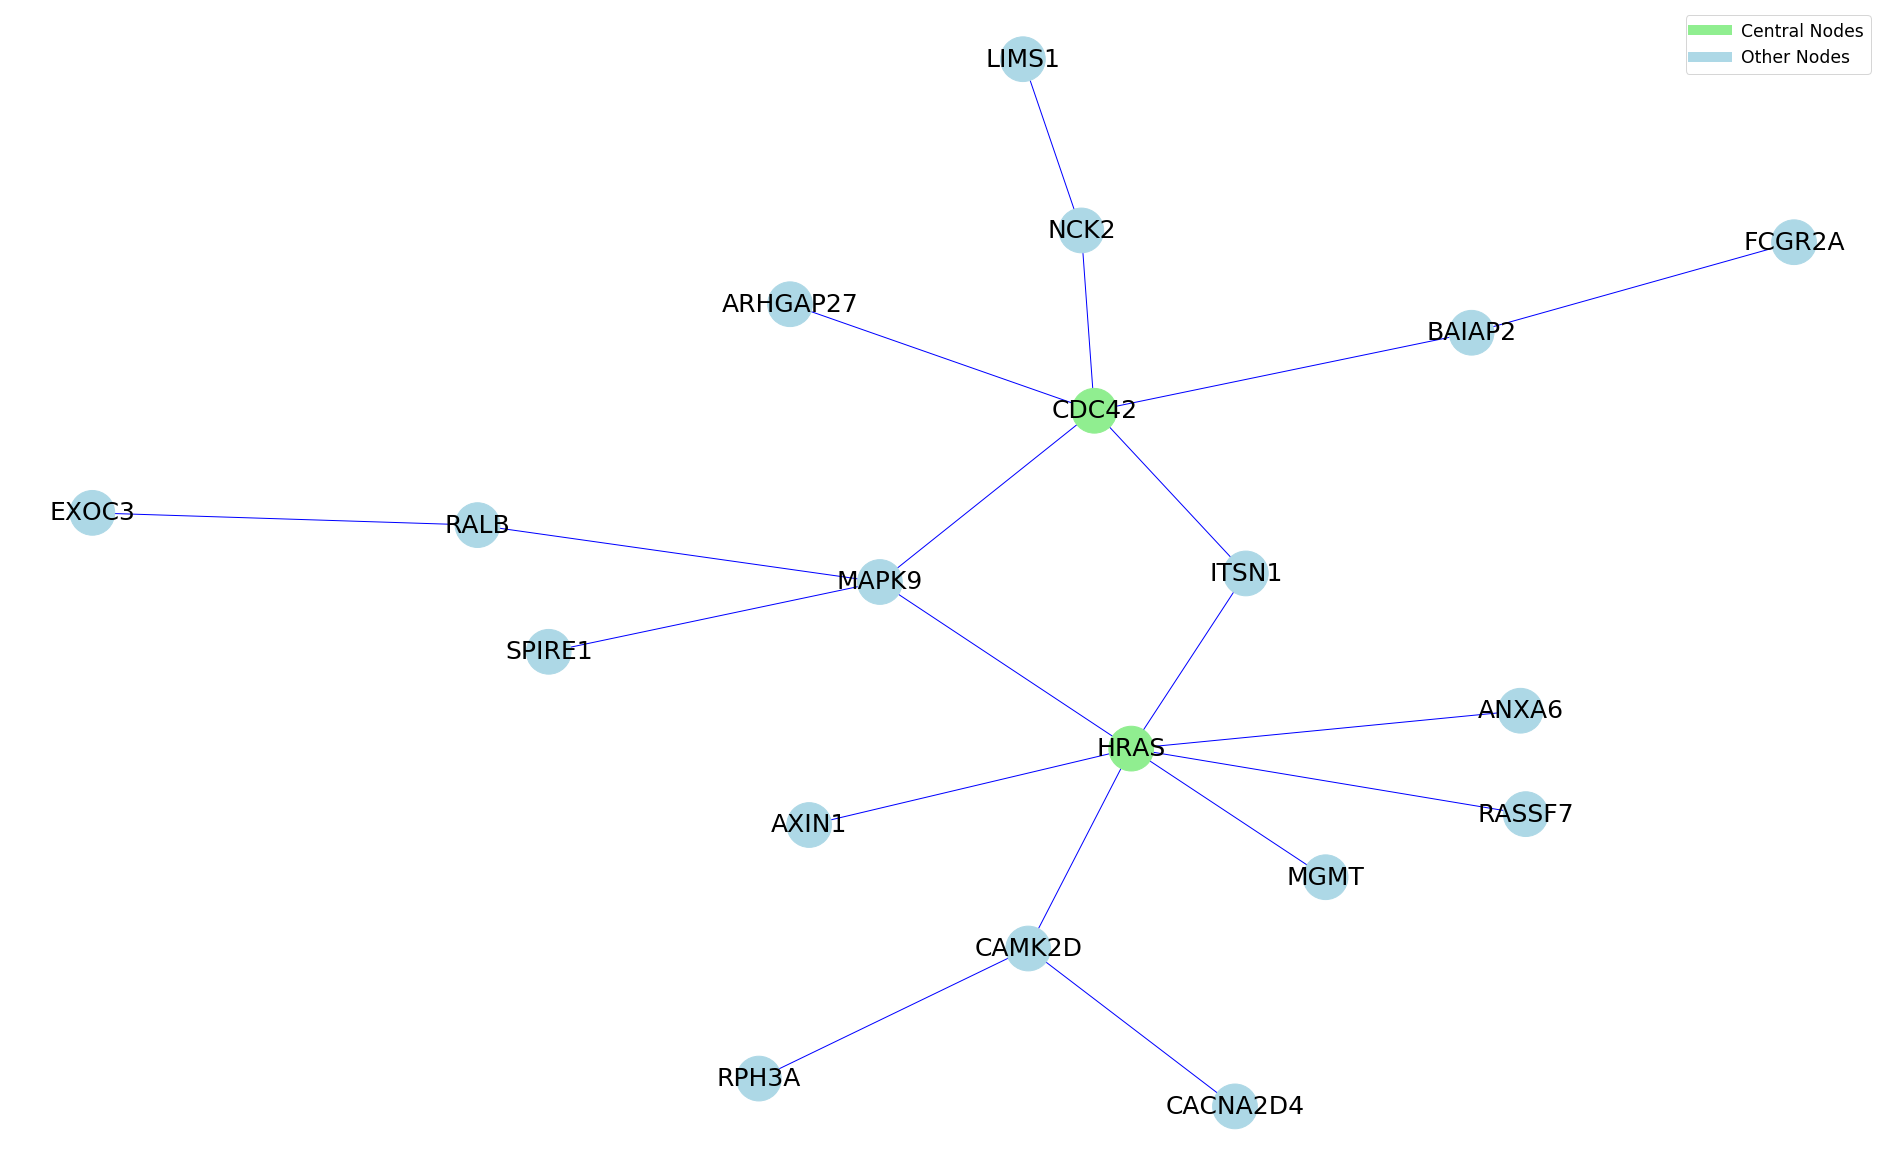

In [13]:
# Highlight central nodes
key_nodes = ['CDC42', 'HRAS']
lines = open('nean_subnet_edges_naive.txt', 'r').read().splitlines()
for line in lines[1:]:
    temp = line.split('\t')
    if temp[0] in key_nodes or temp[1] in key_nodes:
        G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='green')
    else:
        G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='blue')
edges = G.edges()
colors = [G[u][v]['color'] for u, v in edges]

node_map = []
color_map = []
legend_to_do = []
for node in G:
    if node in key_nodes:
        color_map.append('lightgreen')
    else:
        color_map.append('lightblue')
legend_to_do.append(('Central Nodes', 'lightgreen'))
legend_to_do.append(('Other Nodes', 'lightblue'))

fig = plt.figure()
fig.set_figheight(16)
fig.set_figwidth(26)
nx.draw(G, pos=graphviz_layout(G), edges=edges, edge_color=colors, with_labels=True,
        node_color=color_map, font_size=25, node_size=2000)

custom_lines = []
labels = []
for item in legend_to_do:
    custom_lines.append(Line2D([0], [0], color=item[1], lw=10))
    labels.append(item[0])

plt.legend(custom_lines, labels, loc=0, fontsize='xx-large')
plt.show()